#### EDA And Feature Engineering Of Google Play Store Dataset: 
1) Problem statement. Today, 1.85 million different apps are available for users to download. Android users have even more from which to choose, with 2.56 million available through the Google Play Store. These apps have come to play a huge role in the way we live our lives today. Our Objective is to find the Most Popular Category, find the App with largest number of installs , the App with largest size etc. 2) Data Collection.

The data consists of 20 column and 10841 rows.

Steps We Are Going to Follow
Data Clearning
Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
# 1.cheak missing values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# observations: 
         # data set have missing values

In [8]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [9]:
#2.Encoding with Reviews( here all numeric but in string so convert in int)
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [10]:
# df['Reviews']=df['Reviews'].astype(int) # error : invalid literal for int() with base 10: '3.0M' ,,it means there are presernt int the Reviews columnm '3.0M'

In [11]:
df['Reviews'].str.isnumeric().sum()       # means 10840 Reviews are string nummeric but 1 Rewviews in not in the form of str numeric form

10840

In [12]:
df[~df['Reviews'].str.isnumeric()]      # ~ means not numeric

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Here we can remove this datapoint(because it is only one can't be effect on 10k datapoints)
                                          or
we can convert 3.0M to 3 it's your choice,,i am deleting here

In [13]:
df_copy=df.copy()

In [14]:
df_copy.index[10472]

10472

In [15]:
df_copy=df_copy.drop(df_copy.index[10472])

In [16]:
df_copy.shape

(10840, 13)

In [17]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [18]:
df_copy[~df_copy['Reviews'].str.isnumeric()]      # it means all are in str num formart

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [19]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [20]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [21]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [22]:
#3. data encodig with Size colummn  ,,, convert in kb
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [23]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

'''
The first two lines of code use .str.replace() because they are designed to perform string-level 
operations on each element of the 'Size' column individually. Specifically, you are replacing
characters in the string representation of sizes (such as 'M' and 'k') with appropriate values. 
This is necessary when dealing with textual representations of sizes.

On the other hand, the last two lines utilize .replace() and .astype(float) for broader column-level operations.
Instead of focusing on individual characters within each string, these operations are applied to the 
entire 'Size' column.
'''

"\nThe first two lines of code use .str.replace() because they are designed to perform string-level \noperations on each element of the 'Size' column individually. Specifically, you are replacing\ncharacters in the string representation of sizes (such as 'M' and 'k') with appropriate values. \nThis is necessary when dealing with textual representations of sizes.\n\nOn the other hand, the last two lines utilize .replace() and .astype(float) for broader column-level operations.\nInstead of focusing on individual characters within each string, these operations are applied to the \nentire 'Size' column.\n"

In [24]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


In [25]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [26]:
# 4 installs and Price column
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [27]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [28]:
char_to_remove=[',','+','$']
colum_to_clean=['Installs','Price']
for item in char_to_remove:
    for cols in colum_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [29]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [30]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [31]:
df_copy['Installs']=df_copy['Installs'].astype(int)
df_copy['Price']=df_copy['Price'].astype(float)

In [32]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


In [33]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [34]:
#5. Last Updated colulmn
df_copy['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [35]:
pd.to_datetime(df_copy['Last Updated'])

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [36]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Day']=df_copy['Last Updated'].dt.day
df_copy['Month']=df_copy['Last Updated'].dt.month
df_copy['Year']=df_copy['Last Updated'].dt.year

In [37]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [38]:
df_copy.drop('Last Updated',axis=1,inplace=True)

In [39]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Day             10840 non-null  int32  
 13  Month           10840 non-null  int32  
 14  Year            10840 non-null  int32  
dtypes: float64(3), int32(5), object(7)
memory usage: 1.1+ MB


In [40]:
# 6.Content Rating  OHE
df_copy['Content Rating'].value_counts()

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [41]:
df_copy['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder()
encoded=encoder.fit_transform(df_copy[['Content Rating']])
encoded_df=pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out())
# encoded_df=pd.DataFrame(encoded.toarray(), columns=['Content Rating_Adults only 18+','Content Rating_Everyone',	'Content Rating_Everyone 10+'	,'Content Rating_Mature 17+',	'Content Rating_Teen'	,'Content Rating_Unrated'])

In [43]:
encoded_df

,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
10835,0.0,1.0,0.0,0.0,0.0,0.0
10836,0.0,1.0,0.0,0.0,0.0,0.0
10837,0.0,1.0,0.0,0.0,0.0,0.0
10838,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
df_copy=pd.concat([df_copy,encoded_df],axis=1)

'''
Additionally, if the data types of the columns in the two DataFrames are different, pandas will try to convert them to a common data type. 
For example, if one DataFrame has a column with integers and the other has the same column name with floats, pandas may convert the entire
 column to a common data type that can accommodate both integers and floats, such as converting everything to floats.

'''

'\nAdditionally, if the data types of the columns in the two DataFrames are different, pandas will try to convert them to a common data type. \nFor example, if one DataFrame has a column with integers and the other has the same column name with floats, pandas may convert the entire\n column to a common data type that can accommodate both integers and floats, such as converting everything to floats.\n\n'

In [45]:
df_copy.drop('Content Rating',axis=1,inplace=True)

In [46]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, 0 to 10472
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   App                             10840 non-null  object 
 1   Category                        10840 non-null  object 
 2   Rating                          9366 non-null   float64
 3   Reviews                         10840 non-null  float64
 4   Size                            9145 non-null   float64
 5   Installs                        10840 non-null  float64
 6   Type                            10839 non-null  object 
 7   Price                           10840 non-null  float64
 8   Genres                          10840 non-null  object 
 9   Current Ver                     10832 non-null  object 
 10  Android Ver                     10838 non-null  object 
 11  Day                             10840 non-null  float64
 12  Month                           10840

In [47]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Current Ver,Android Ver,Day,Month,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Art & Design,1.0.0,4.0.3 and up,7.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15.0,1.0,2018.0,0.0,1.0,0.0,0.0,0.0,0.0


EDA

In [48]:
df_copy[df_copy.duplicated()].shape

(483, 20)

In [49]:
df_copy[df_copy.duplicated('App')].shape

(1181, 20)

####  Observation
dataset have duplicate datapoints

In [50]:
df_copy=df_copy.drop_duplicates(subset='App',keep='first')

In [51]:
df_copy[df_copy.duplicated('App')].shape

(0, 20)

In [52]:
# lets go ahead and explore more data: 
numeric_feature=[feature for feature in df_copy.columns if df_copy[feature].dtype!='O']
categorical_feature=[feature for feature in df_copy.columns if df_copy[feature].dtype=='O']

print("we have {} numerical features: {}".format(len(numeric_feature),numeric_feature))
print("we have {} categorical features: {}".format(len(categorical_feature),categorical_feature))

we have 14 numerical features: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year', 'Content Rating_Adults only 18+', 'Content Rating_Everyone', 'Content Rating_Everyone 10+', 'Content Rating_Mature 17+', 'Content Rating_Teen', 'Content Rating_Unrated']
we have 6 categorical features: ['App', 'Category', 'Type', 'Genres', 'Current Ver', 'Android Ver']


In [53]:
len(list(numeric_feature))

14

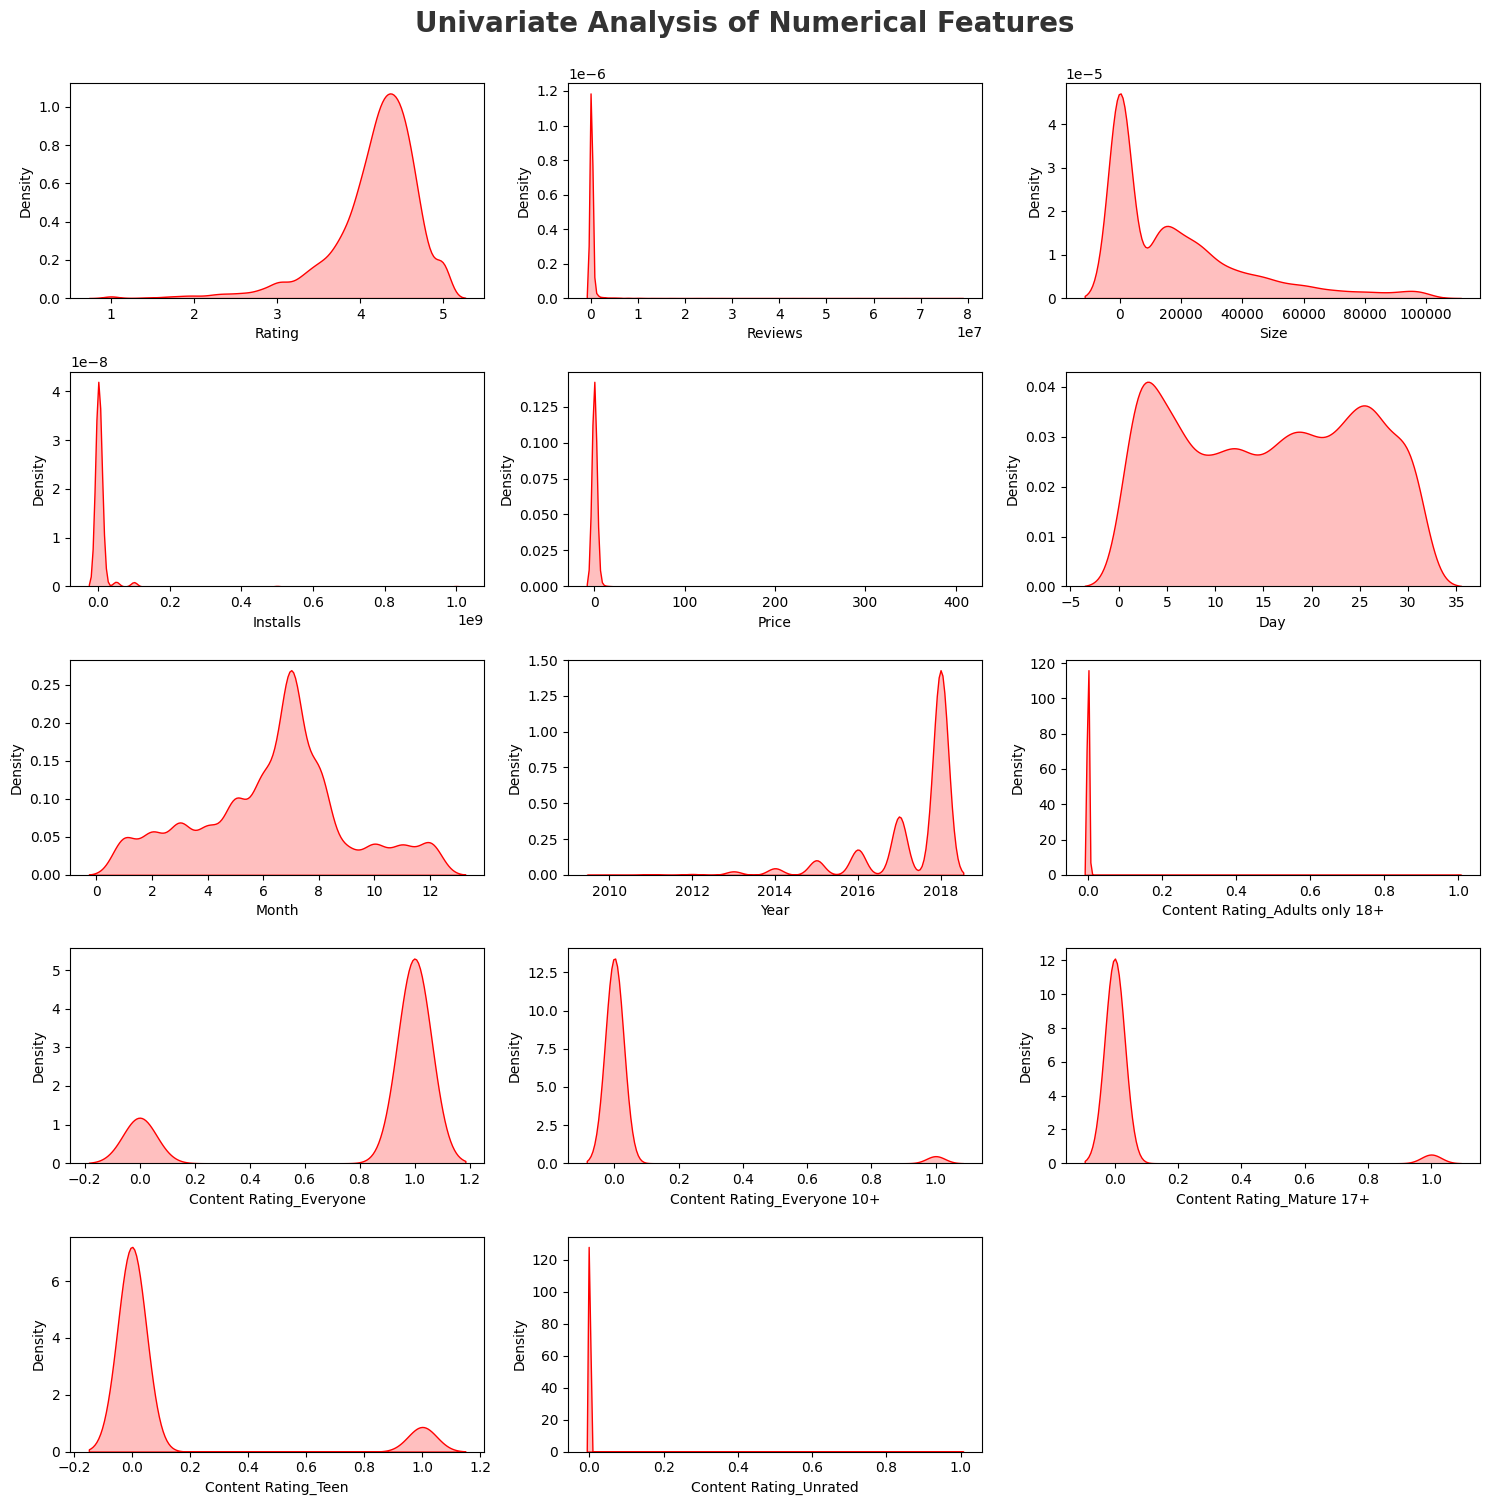

In [54]:
## Visualization Diagrams

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)
# alpha: This parameter takes a value between 0 (completely transparent) and 1 (completely opaque). In this case, it is set to 0.8, meaning that the title will be 80% opaque, allowing some degree of transparency.
# y: This parameter controls the vertical position of the title along the y-axis. A value of 1 means the title will be at the top of the figure, and 0 would place it at the bottom. Values between 0 and 1 would position the title proportionally within the figure height.
for i in range(0, len(numeric_feature)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numeric_feature[i]],shade=True, color='r')  # The shade=True argument fills the area under the curve, and color='r' sets the color of the curve to red.
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()        #plt.tight_layout(): This adjusts the spacing between subplots to prevent overlapping.

#### Observations: 
Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

In [55]:
categorical_feature

['App', 'Category', 'Type', 'Genres', 'Current Ver', 'Android Ver']

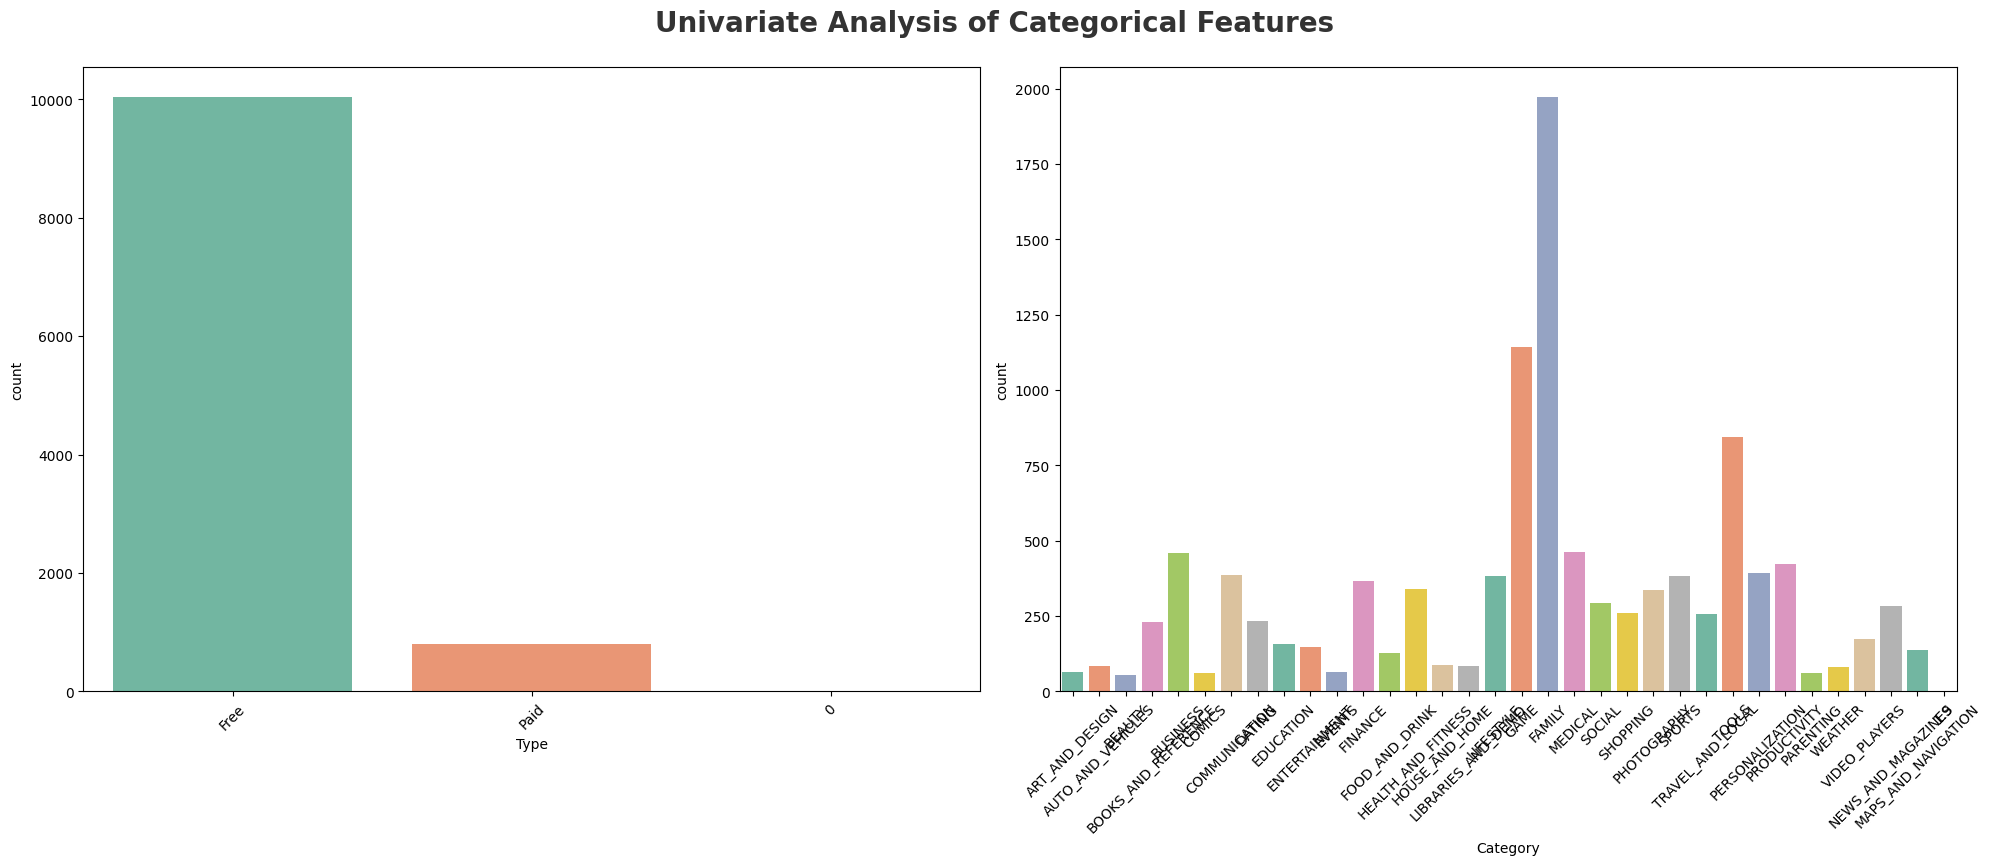

In [60]:
# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type','Category']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

Q.which is the most popular app categary of the App?

In [62]:
df_copy['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

<Axes: ylabel='count'>

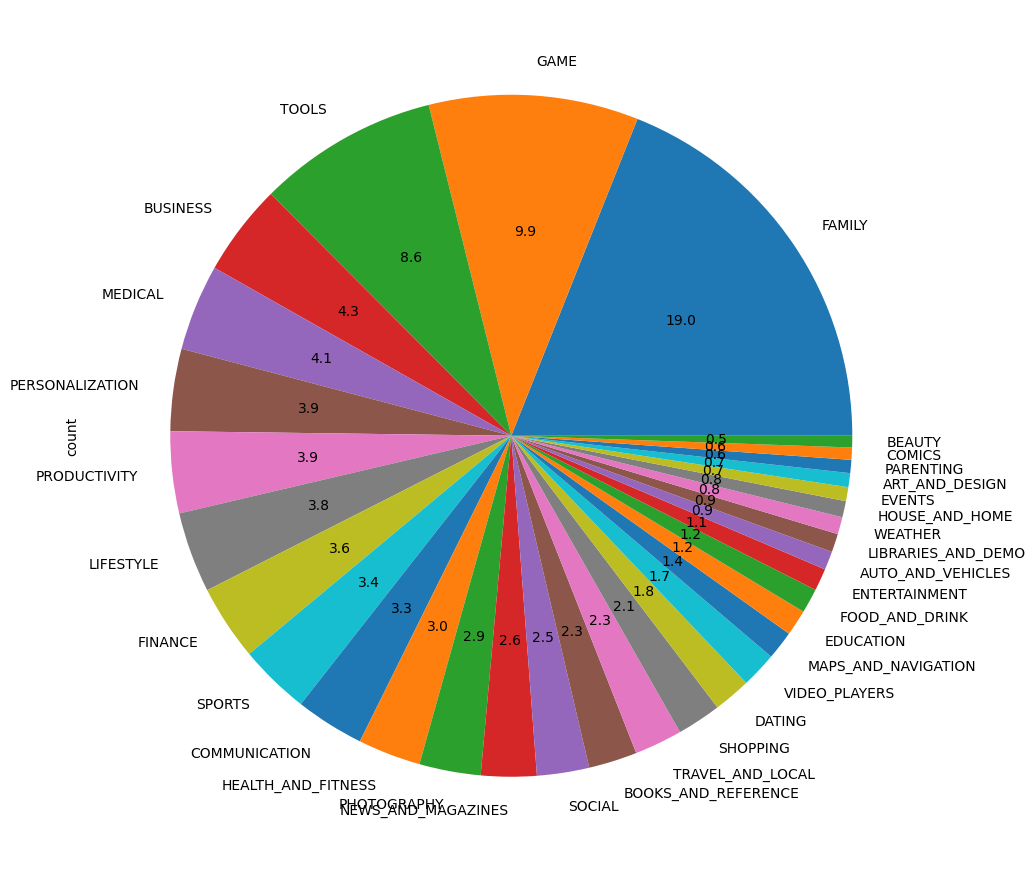

In [66]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'],figsize=(11,12),autopct='%1.1f')

#### Observations: 
1.There are more kinds of apps in playstore which are under category of family, games & tools<br>
2.Beatuty,comics,arts and weather kinds of apps are very less in playstore

### top 10 App categary

In [67]:
## Top 10 App Categories
category = pd.DataFrame(df_copy['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

In [68]:
category

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


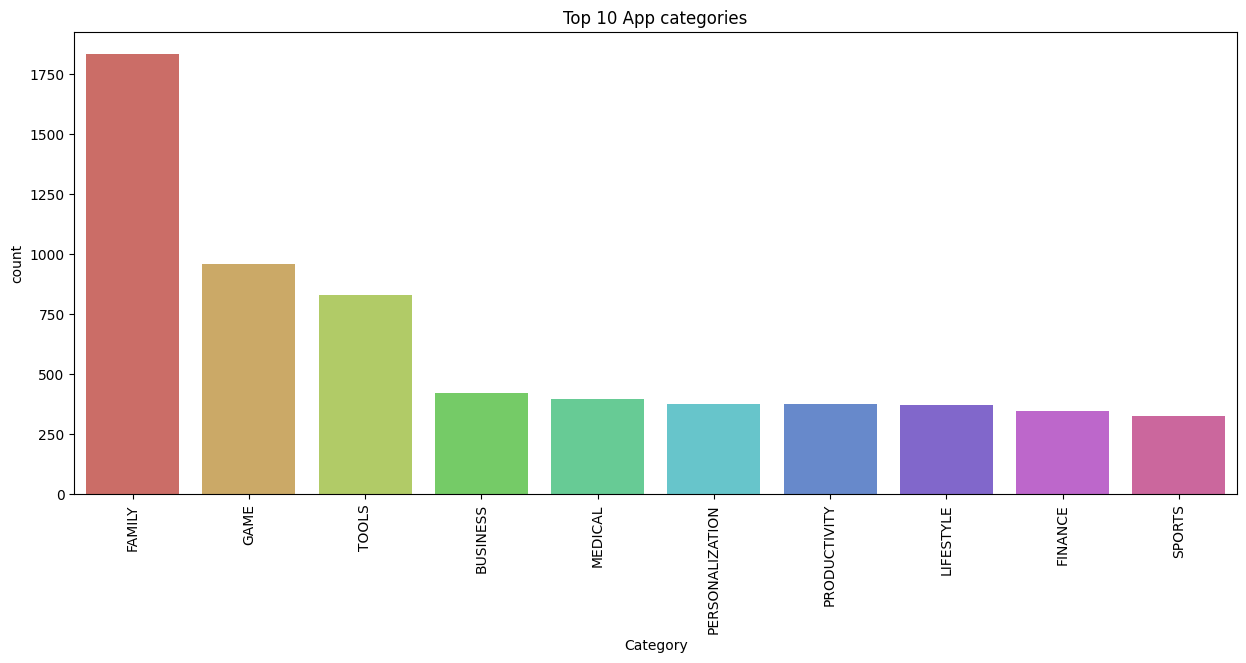

In [73]:
# top 10 app
plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10],y='count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

In [74]:
category.index[:10]

Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PERSONALIZATION',
       'PRODUCTIVITY', 'LIFESTYLE', 'FINANCE', 'SPORTS'],
      dtype='object', name='Category')

#### Insights:<br> 
Family category has the most number of apps with 18% of apps belonging to it, followed by Games category which has 11% of the apps.<br>
Least number of apps belong to the Beauty category with less than 1% of the total apps belonging to it.

#### Internal Assignments: <br>
1.Which Category has largest number of installations??<br>
2.What are the Top 5 most installed Apps in Each popular Categories ??<br>
3.How many apps are there on Google Play Store which get 5 ratings??<br>